In [1]:
import pandas as pd

In [2]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Load your datasets
df_soil = pd.read_csv(r"D:\Downloads\soil.csv")
df_soil_target = pd.read_csv(r"D:\Downloads\soil_target.csv")

# Inspect the data
print(df_soil.head())
print(df_soil_target.head())


    A(410)   B(435)   C(460)   D(485)   E(510)   F(535)  G(560)  H(585)  \
0  1945.57   992.41  2051.13   707.77   822.51  1371.58  318.71  315.85   
1  2336.77   816.05  2008.33   693.91   848.56  1691.27  373.00  375.11   
2  1625.50  1070.13  2472.09   810.33   960.65  1745.17  428.89  436.37   
3  2557.95  1594.40  2790.56  1008.17  1128.00  1570.73  488.55  499.64   
4  3262.28  1300.30  2948.80   949.85  1114.58  2049.14  501.99  513.20   

    R(610)  I(645)  S(680)  J(705)  U(760)  V(810)  W(860)  K(900)  L(940)  \
0  1305.33  159.24  329.50   49.90   75.75  237.65  305.23   60.10   36.52   
1  1339.28  188.68  308.97   62.27   69.30  242.82  277.02   82.78   44.74   
2  1206.99  226.15  292.57   63.53   68.50  211.82  273.69   88.45   47.47   
3  1339.11  261.84  357.22   77.09   77.36  229.90  315.37   98.09   54.78   
4  1482.11  268.53  338.74   77.09   75.75  260.90  307.48  108.30   55.69   

   T(730)  
0   83.32  
1   77.27  
2   75.75  
3   84.07  
4   86.69  
     pH 

In [4]:
print(df_soil.shape)
print(df_soil_target.shape)


(100, 18)
(100, 13)


In [5]:
import numpy as np

# Number of new rows to add
num_new_rows = 900

# Function to generate new rows by adding small random perturbations
def augment_data(df, num_new_rows):
    new_rows = df.sample(n=num_new_rows, replace=True).apply(
        lambda x: x + np.random.normal(loc=0, scale=0.05 * x.std(), size=len(x))
    )
    return pd.concat([df, new_rows], ignore_index=True)

# Augment both datasets
augmented_soil = augment_data(df_soil, num_new_rows)
augmented_soil_target = augment_data(df_soil_target, num_new_rows)

# Save the augmented datasets
augmented_soil.to_csv('augmented_soil.csv', index=False)
augmented_soil_target.to_csv('augmented_soil_target.csv', index=False)

print("Augmentation completed and saved to 'augmented_soil.csv' and 'augmented_soil_target.csv'")


Augmentation completed and saved to 'augmented_soil.csv' and 'augmented_soil_target.csv'


In [6]:
# Replace null values in columns with the column mean
df_filled_soil = df_soil.fillna(df_soil.mean())
df_filled_soil_target = df_soil_target.fillna(df_soil_target.mean())

# Save the updated datasets
df_filled_soil.to_csv('filled_soil.csv', index=False)
df_filled_soil_target.to_csv('filled_soil_target.csv', index=False)

print("Null values replaced with column mean and saved to 'filled_soil.csv' and 'filled_soil_target.csv'")


Null values replaced with column mean and saved to 'filled_soil.csv' and 'filled_soil_target.csv'


In [7]:
X=pd.read_csv('augmented_soil.csv')

In [8]:
X.shape

(1000, 18)

In [9]:
X.isnull().sum()

A(410)    0
B(435)    0
C(460)    0
D(485)    0
E(510)    0
F(535)    0
G(560)    0
H(585)    0
R(610)    0
I(645)    0
S(680)    0
J(705)    0
U(760)    0
V(810)    0
W(860)    0
K(900)    0
L(940)    0
T(730)    0
dtype: int64

In [10]:
X.describe()

,A(410),B(435),C(460),D(485),E(510),F(535),G(560),H(585),R(610),I(645),S(680),J(705),U(760),V(810),W(860),K(900),L(940),T(730)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2180.233754,1022.993077,2461.431915,716.050796,963.900916,1462.887198,396.190181,402.573236,1137.334359,223.539628,269.757072,62.727560,75.256522,195.422462,243.573611,88.206281,43.687554,79.331836
std,593.550607,212.138871,439.842996,158.250080,134.887733,351.834697,60.526976,61.876884,247.917613,192.735006,70.993553,23.948396,68.752227,42.852237,62.809477,18.829723,7.327433,21.156530
min,578.264872,236.867563,944.716456,187.195536,379.258107,688.055673,181.339519,205.936553,550.344323,56.007861,63.123222,33.120965,32.557070,109.896406,50.591624,33.479759,22.666290,49.735984
25%,1798.282592,907.070690,2172.235953,637.463912,894.074686,1201.496560,361.327645,371.569192,975.763463,186.382268,234.883638,53.803029,56.369835,163.981431,208.204862,75.250102,38.939376,70.856137
50%,2185.333030,1019.940269,2401.891788,685.208288,973.255549,1332.904206,391.064074,398.916173,1137.210575,206.345164,278.367259,59.556245,66.890000,178.210000,230.880000,85.155218,41.142296,79.480201
75%,2471.504157,1133.360159,2745.873812,850.292257,1061.513182,1840.122765,435.821482,441.871831,1342.981385,227.557408,330.104445,69.594452,73.485544,236.790000,301.100540,96.658778,49.667540,84.255035
max,3876.653027,1954.000606,3692.811021,1259.794322,1491.694400,2271.338605,566.368922,573.828817,2048.459902,2215.869107,512.050419,343.760813,709.435922,312.433833,511.551334,157.288963,74.104526,258.046970


In [11]:
y=pd.read_csv('augmented_soil_target.csv')

In [12]:
y.shape

(1000, 13)

In [13]:
data=pd.concat([X,y],axis=1)

In [14]:
data.head()

,A(410),B(435),C(460),D(485),E(510),F(535),G(560),H(585),R(610),I(645),...,P (kg/ha),K (kg/ha),Ca (meq/100g),Mg (meq/100g),S (ppm),Fe (ppm),Mn (ppm),Cu (ppm),Zn (ppm),B (ppm)
0,1945.57,992.41,2051.13,707.77,822.51,1371.58,318.71,315.85,1305.33,159.24,...,26.10,444.00,6.14,2.32,11.21,3.08,14.10,2.23,0.84,1.22
1,2336.77,816.05,2008.33,693.91,848.56,1691.27,373.00,375.11,1339.28,188.68,...,81.99,372.00,5.98,0.50,12.93,47.74,37.63,3.28,6.79,1.13
2,1625.50,1070.13,2472.09,810.33,960.65,1745.17,428.89,436.37,1206.99,226.15,...,80.59,132.00,3.15,2.49,5.17,14.96,44.53,1.22,1.21,0.98
3,2557.95,1594.40,2790.56,1008.17,1128.00,1570.73,488.55,499.64,1339.11,261.84,...,33.81,221.76,3.40,1.90,11.59,6.38,10.62,1.77,0.99,0.27
4,3262.28,1300.30,2948.80,949.85,1114.58,2049.14,501.99,513.20,1482.11,268.53,...,38.19,234.08,6.60,5.20,34.10,14.08,3.56,1.56,0.40,0.77


In [15]:
data.shape

(1000, 31)

In [16]:
data.isna().sum()

A(410)            0
B(435)            0
C(460)            0
D(485)            0
E(510)            0
F(535)            0
G(560)            0
H(585)            0
R(610)            0
I(645)            0
S(680)            0
J(705)            0
U(760)            0
V(810)            0
W(860)            0
K(900)            0
L(940)            0
T(730)            0
pH               50
EC  (dS/m)       50
OC (%)           50
P   (kg/ha)      50
K (kg/ha)        50
Ca (meq/100g)    78
Mg (meq/100g)    50
S (ppm)          50
Fe (ppm)         50
Mn (ppm)         50
Cu (ppm)         50
Zn (ppm)         50
B (ppm)          50
dtype: int64

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [18]:
#Defining function for Continuous variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    

C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vanshika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vanshika\anac

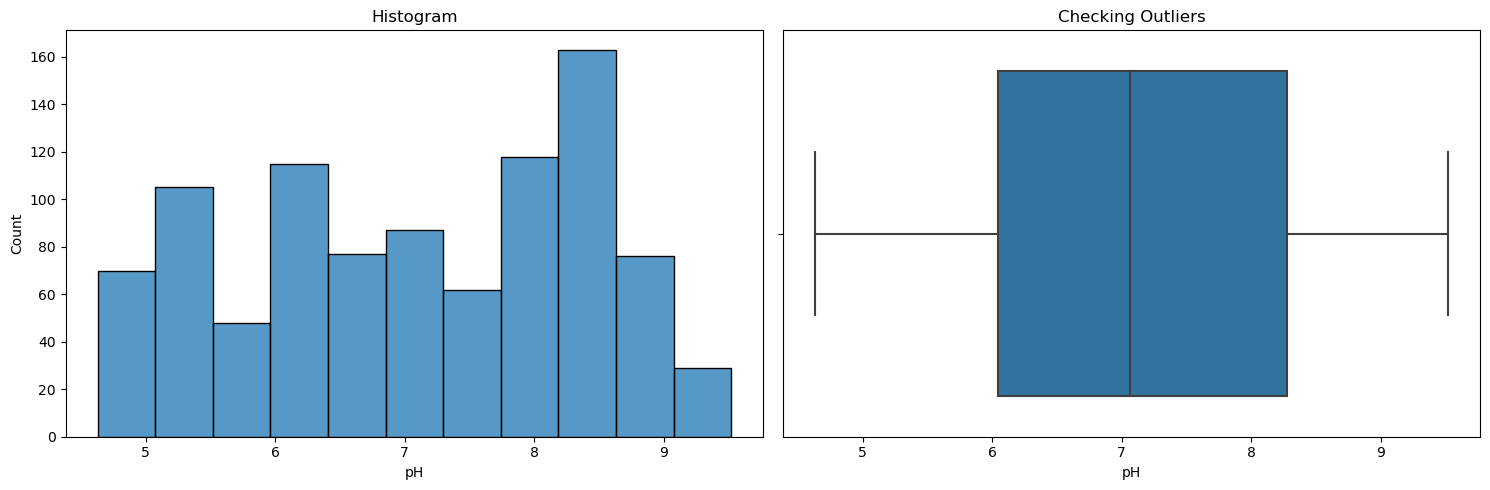

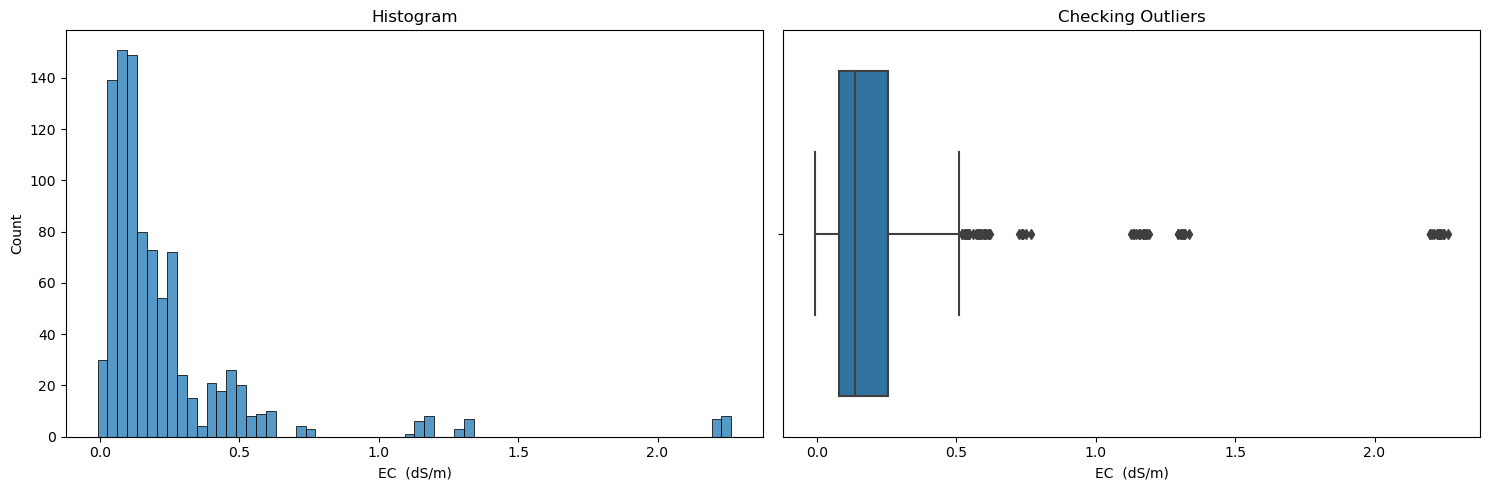

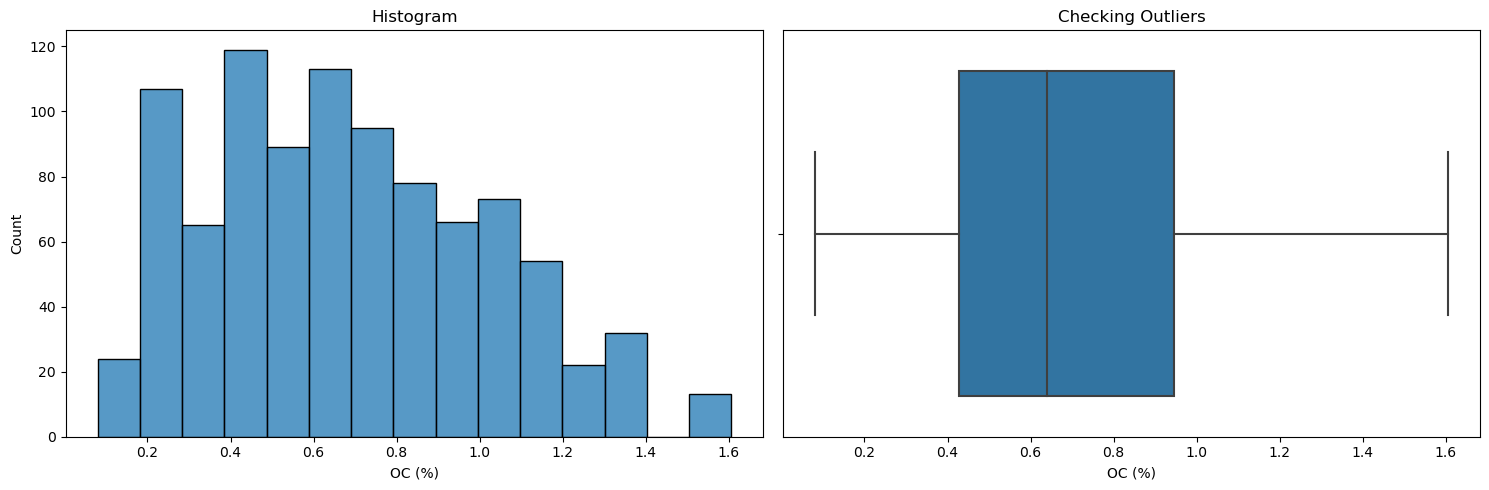

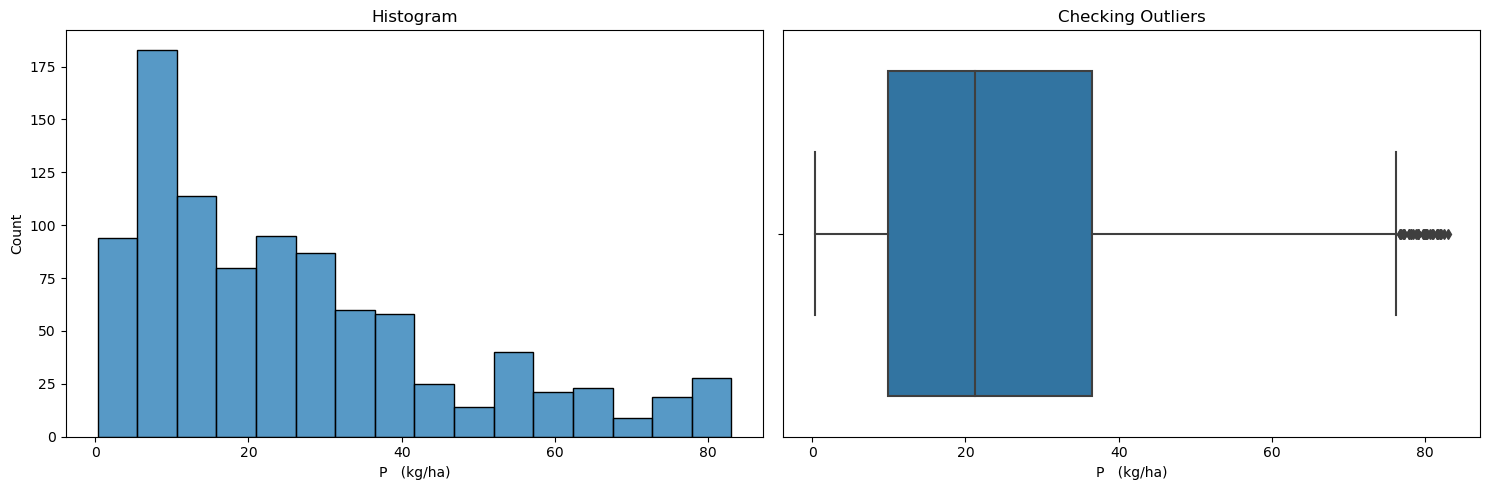

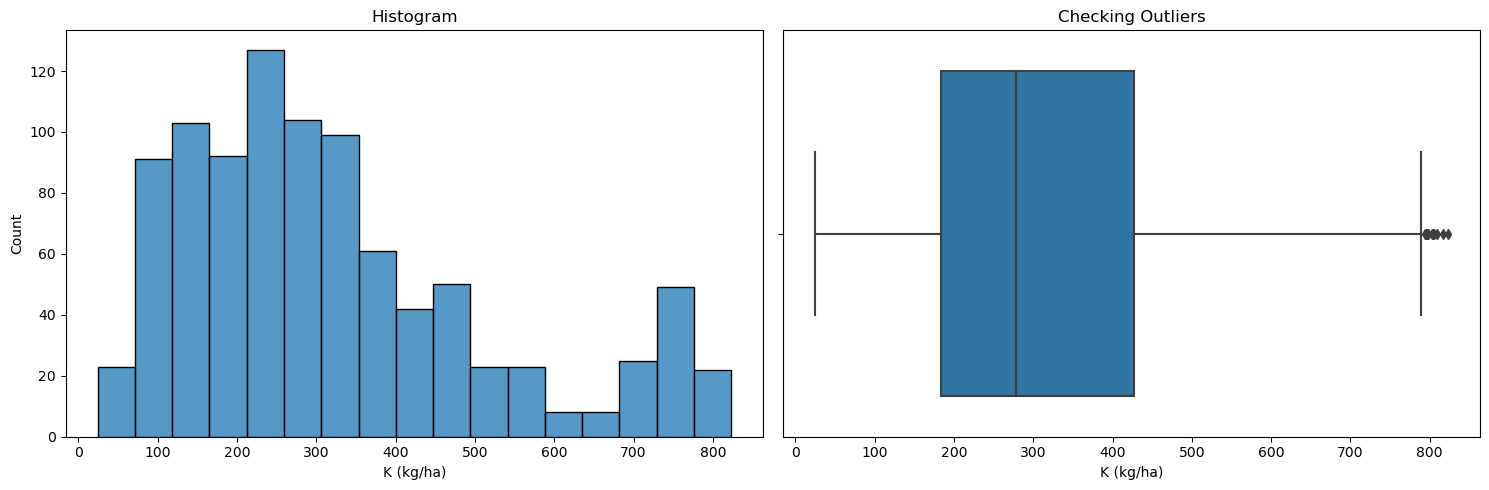

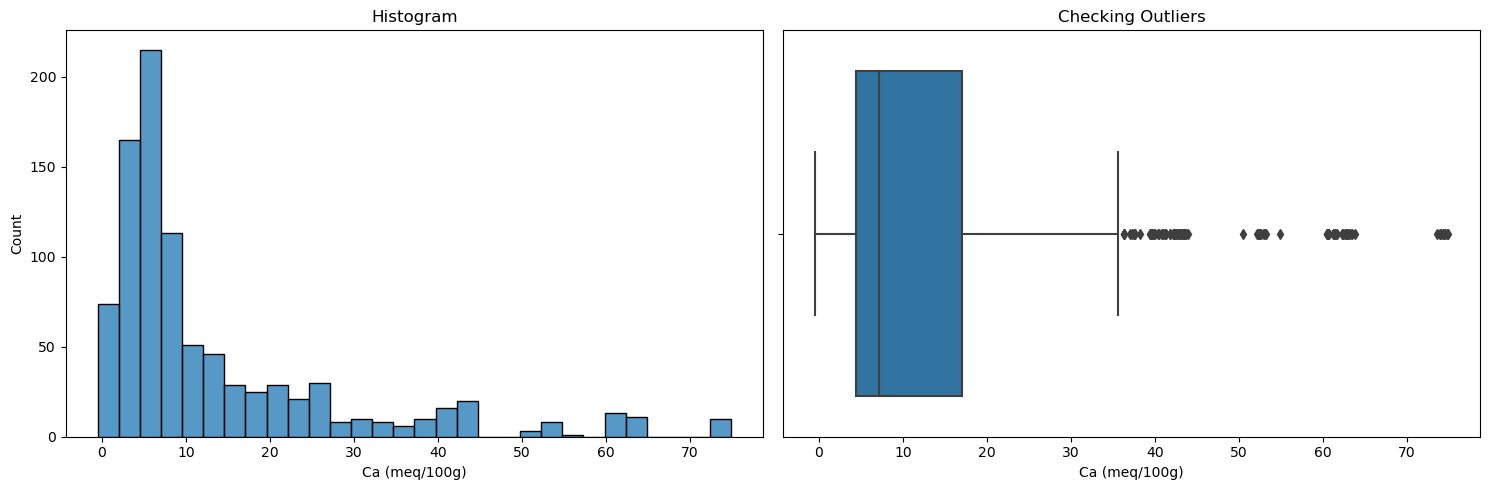

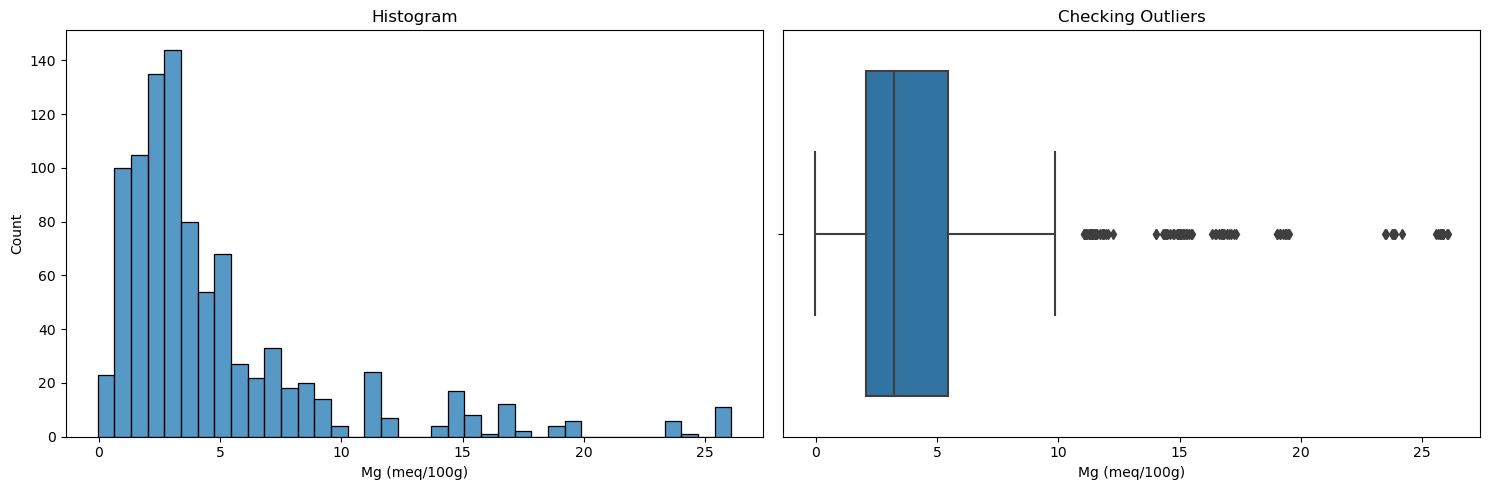

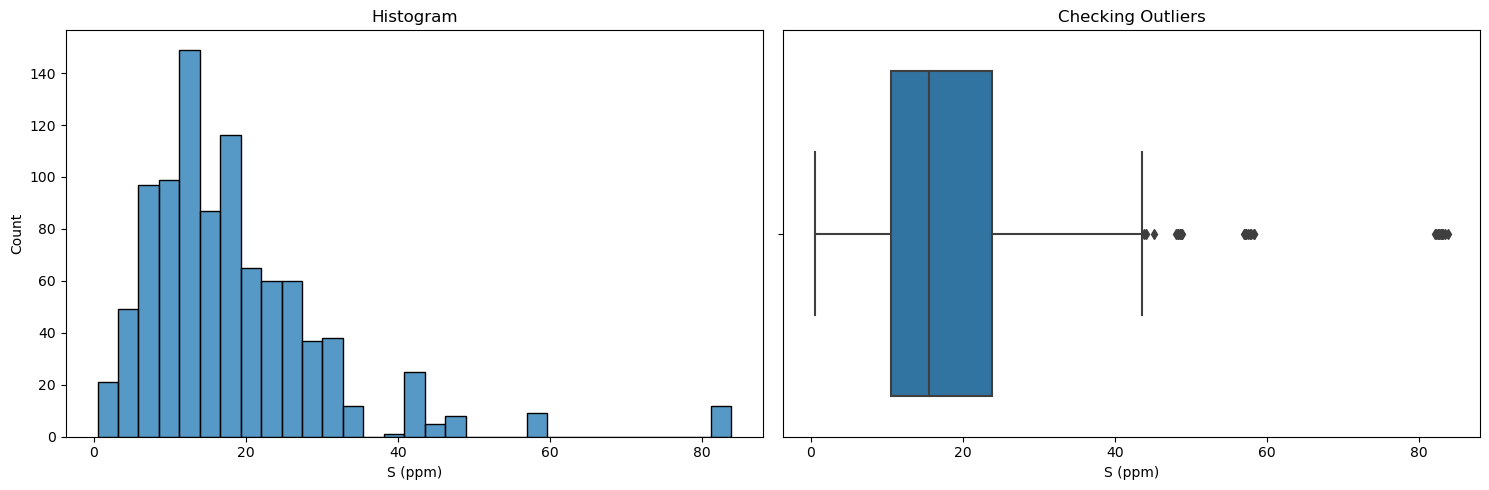

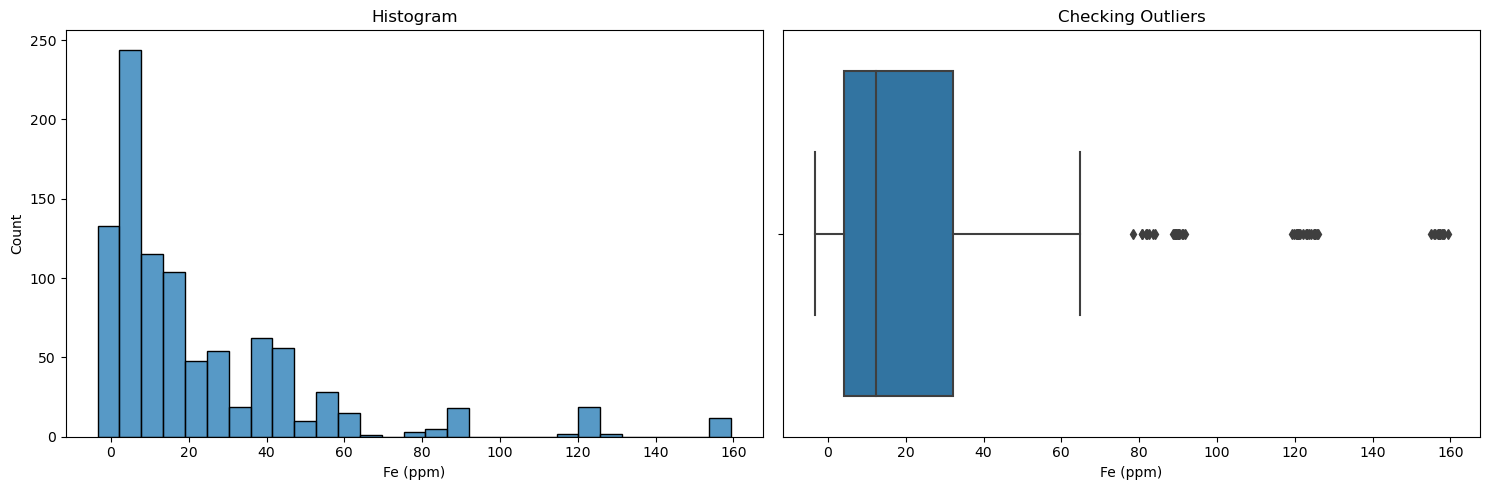

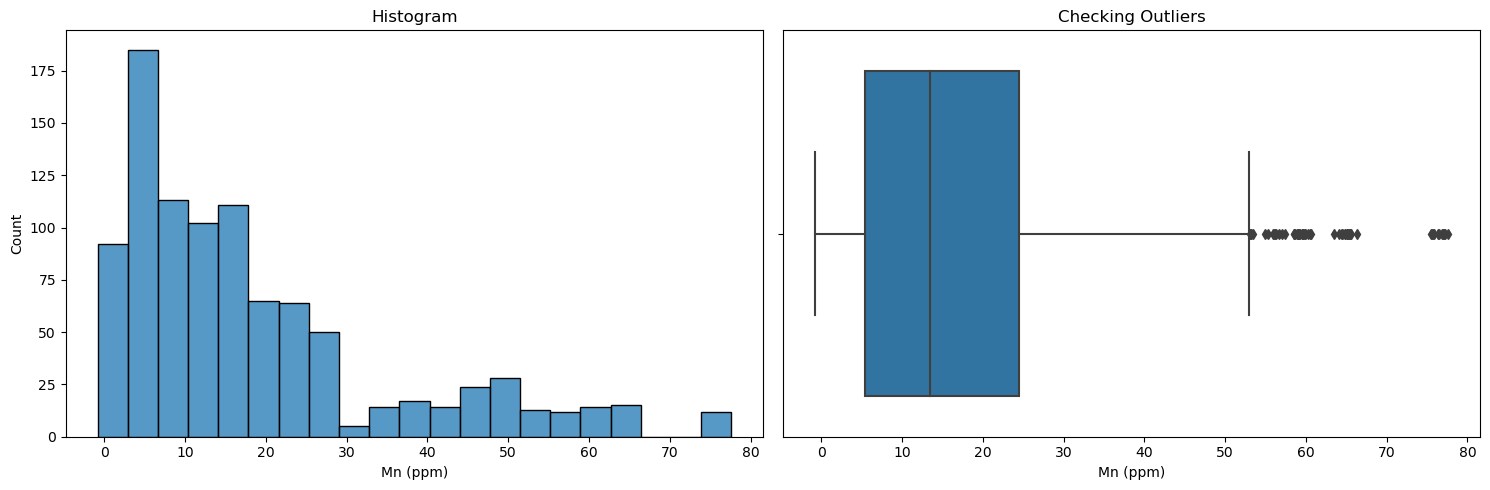

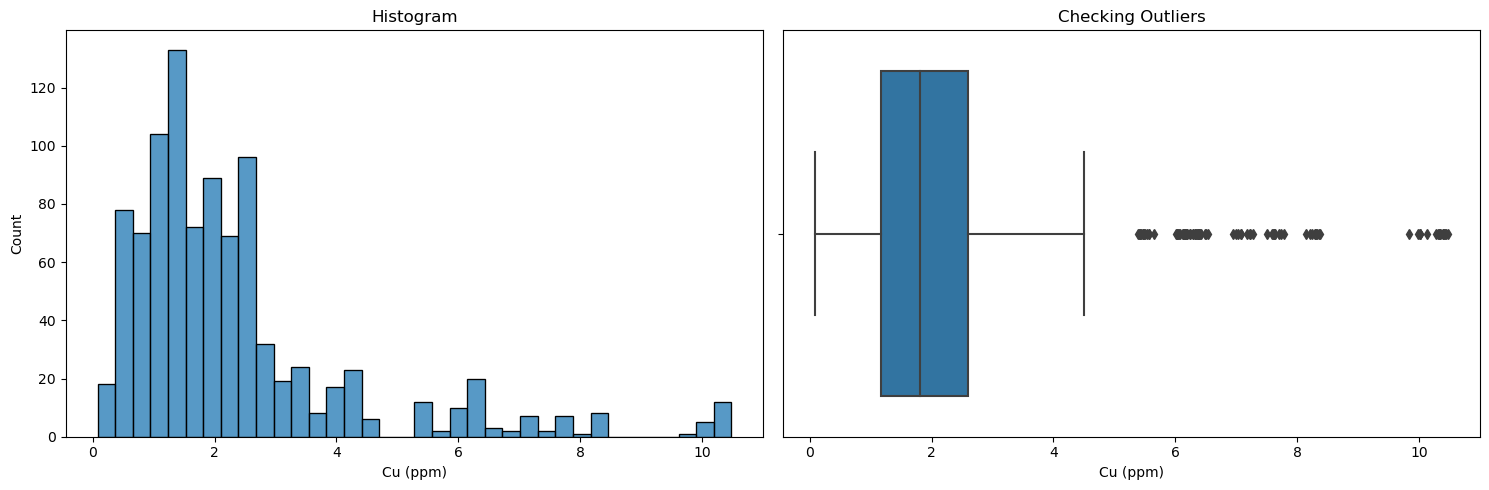

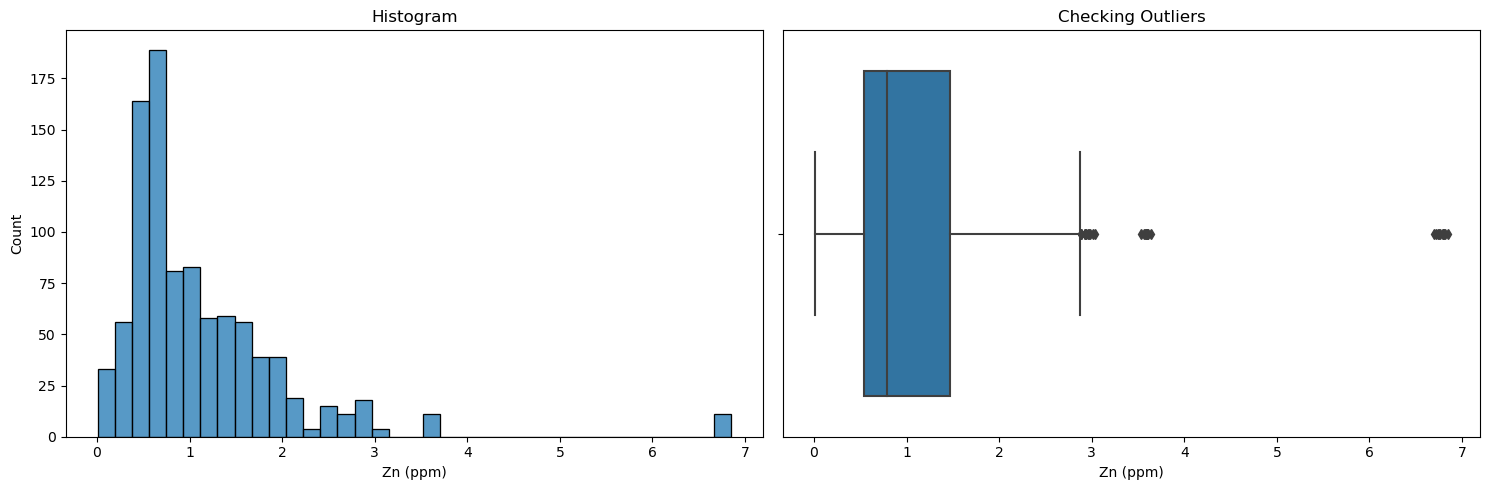

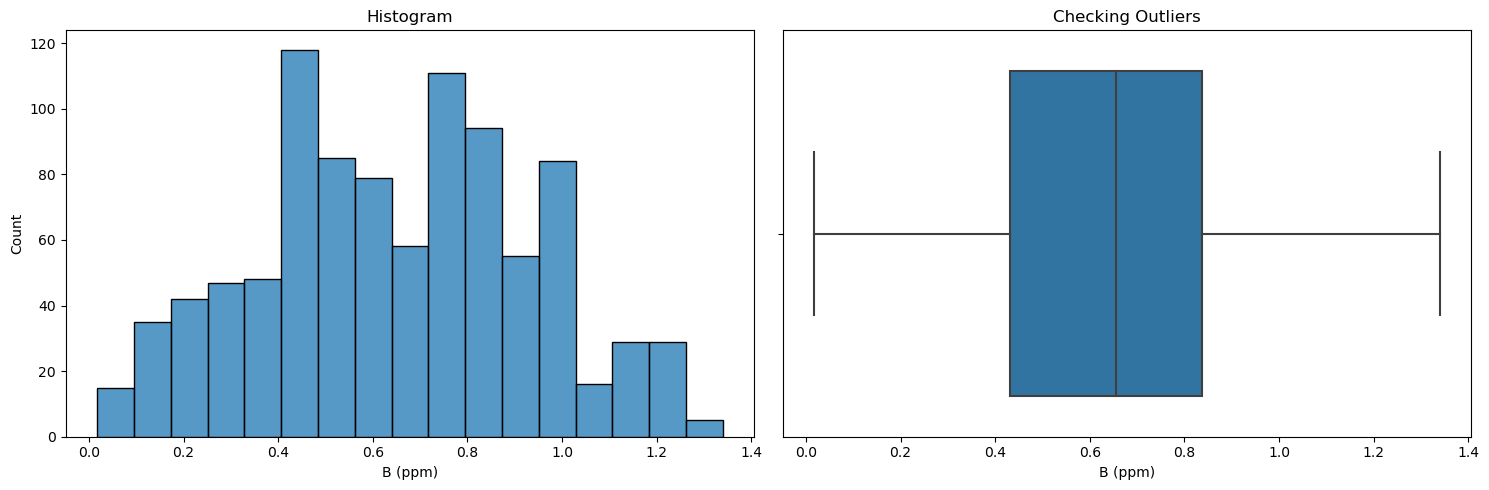

In [19]:
#plotting the target values
import seaborn as sns
for col in y.columns:
    plot_conti(y[col])

In [20]:
# Impute missing values in features and target
imputer_X = SimpleImputer(strategy='mean')
X_imputed = imputer_X.fit_transform(X)
imputer_y = SimpleImputer(strategy='mean')
y_imputed = imputer_y.fit_transform(y)


In [21]:
# Check if there are any NaN values left in the imputed arrays
import numpy as np
print("Any missing values in X_imputed?", np.any(np.isnan(X_imputed)))
print("Any missing values in y_imputed?", np.any(np.isnan(y_imputed)))

Any missing values in X_imputed? False
Any missing values in y_imputed? False


In [22]:
# Preprocess the data
from sklearn.preprocessing import RobustScaler
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X_imputed)

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler (for normalization)
scaler_norm = MinMaxScaler()

# Fit and transform the scaled data
X_scaled_norm = scaler_norm.fit_transform(X_scaled)


In [24]:
'''X_train, X_test, y_train, y_test = train_test_split(X_scaled_norm, y_imputed, test_size=0.2, random_state=42)'''

'X_train, X_test, y_train, y_test = train_test_split(X_scaled_norm, y_imputed, test_size=0.2, random_state=42)'

In [25]:
'''# Model training for GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=RBF())
gpr.fit(X_train, y_train)'''

'# Model training for GaussianProcessRegressor\ngpr = GaussianProcessRegressor(kernel=RBF())\ngpr.fit(X_train, y_train)'

In [26]:
'''import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error

# Assuming X_scaled and y_imputed are your preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

# Define an RBF kernel with an initial length scale
kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Initialize Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Define parameters for Grid Search
param_grid = {
    'alpha': [1e-2, 1e-1, 1.0, 10.0, 100.0],  # Regularization parameter
    'kernel__k2__length_scale': [0.1, 1.0, 10.0]  # Length scale parameter for the RBF kernel
}

# Define custom scoring metrics
r2_scorer = make_scorer(r2_score)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # Lower is better for MSE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # Lower is better for MAE

# Initialize GridSearchCV with k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=gpr, param_grid=param_grid, scoring={'r2': r2_scorer, 'mse': mse_scorer, 'mae': mae_scorer}, refit='r2', cv=kfold, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and results
print("Best Parameters found:")
print(grid_search.best_params_)
print("\nBest R2 Score found:")
print(grid_search.best_score_)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTest R2 Score:", test_r2)
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)
'''

'import numpy as np\nfrom sklearn.gaussian_process import GaussianProcessRegressor\nfrom sklearn.gaussian_process.kernels import RBF, ConstantKernel as C\nfrom sklearn.model_selection import GridSearchCV, train_test_split, KFold\nfrom sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error\n\n# Assuming X_scaled and y_imputed are your preprocessed data\nX_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)\n\n# Define an RBF kernel with an initial length scale\nkernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))\n\n# Initialize Gaussian Process Regressor\ngpr = GaussianProcessRegressor(kernel=kernel, random_state=42)\n\n# Define parameters for Grid Search\nparam_grid = {\n    \'alpha\': [1e-2, 1e-1, 1.0, 10.0, 100.0],  # Regularization parameter\n    \'kernel__k2__length_scale\': [0.1, 1.0, 10.0]  # Length scale parameter for the RBF kernel\n}\n\n# Define custom scoring me

In [33]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_norm, y_imputed, test_size=0.2, random_state=42)

# Convert target DataFrames to numpy arrays
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.values

# Initialize and train the GPR models for each target
gpr_models = [GaussianProcessRegressor() for _ in range(y_train.shape[1])]
for i, gpr in enumerate(gpr_models):
    gpr.fit(X_train, y_train[:, i])  # Correct indexing for numpy arrays

# Predict on the test set
y_pred = np.column_stack([gpr.predict(X_test) for gpr in gpr_models])

# Calculate MSE for each target variable
mse_scores = [mean_squared_error(y_test[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# Print the MSE for each target
for i, mse in enumerate(mse_scores):
    print(f'MSE for target {i+1}: {mse}')


MSE for target 1: 117.66413175455234
MSE for target 2: 5.284992793964157
MSE for target 3: 7.767318427740554
MSE for target 4: 49923.197613755416
MSE for target 5: 10826423.138656534
MSE for target 6: 14918.618448995572
MSE for target 7: 3061.0007209957616
MSE for target 8: 5749.345958634803
MSE for target 9: 358411.96971656015
MSE for target 10: 11352.506786430393
MSE for target 11: 1116.9669122180758
MSE for target 12: 330.47848085992285
MSE for target 13: 13.08748615617131


In [34]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error

# Assuming X_scaled and y_imputed are your preprocessed data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

# Define an RBF kernel with an initial length scale
kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Initialize Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Define parameters for Grid Search
param_grid = {
    'alpha': [1e-2, 1e-1, 1.0, 10.0, 100.0],  # Regularization parameter
    'kernel__k2__length_scale': [0.1, 1.0, 10.0]  # Length scale parameter for the RBF kernel
}

# Define custom scoring metrics
r2_scorer = make_scorer(r2_score)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # Lower is better for MSE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # Lower is better for MAE

# Initialize GridSearchCV with k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=gpr, param_grid=param_grid, scoring={'r2': r2_scorer, 'mse': mse_scorer, 'mae': mae_scorer}, refit='r2', cv=kfold, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and results
print("Best Parameters found:")
print(grid_search.best_params_)
print("\nBest R2 Score found:")
print(grid_search.best_score_)

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTest R2 Score:", test_r2)
print("Test MSE:", test_mse)
print("Test MAE:", test_mae)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\ke

Best Parameters found:
{'alpha': 100.0, 'kernel__k2__length_scale': 0.1}

Best R2 Score found:
-0.12891789054565853

Test R2 Score: -0.16845827063052587
Test MSE: 3400.9755139125778
Test MAE: 17.43148944557289


C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [35]:
def feature_importance_analysis(model, X, feature_names):
    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importances = np.abs(model.coef_)
    else:
        raise AttributeError("Model does not support feature importance analysis.")

    # Create DataFrame
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display importance values
    print(importance_df)

    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()


GaussianProcessRegressor Feature Importance:
        Importance
U(760)    6.532506
H(585)    5.508876
I(645)    5.271914
G(560)    5.049689
B(435)    5.025869
S(680)    4.498659
D(485)    4.175215
K(900)    4.164095
J(705)    4.150374
A(410)    4.010895
E(510)    3.862183
T(730)    3.789998
L(940)    3.737354
W(860)    3.564383
C(460)    3.509845
R(610)    3.147705
V(810)    2.941754
F(535)    2.075619


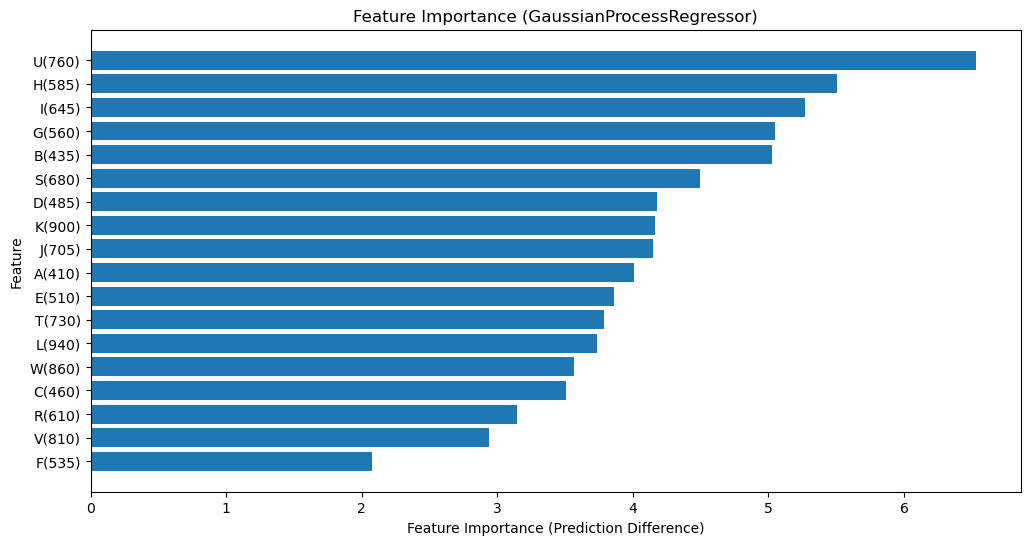

In [36]:
def feature_importance_analysis_gpr(model, X, feature_names):
    # Calculate predictions with all features
    y_pred_all = model.predict(X)

    # Initialize dictionary to store feature importance scores
    feature_importances = {}

    # Iterate over each feature
    for i, feature in enumerate(feature_names):
        # Vary one feature while keeping others constant
        X_variation = X.copy()
        X_variation[:, i] = np.mean(X[:, i])

        # Calculate predictions with the varied feature
        y_pred_variation = model.predict(X_variation)

        # Calculate the difference in predictions caused by varying the feature
        feature_importance = np.abs(y_pred_variation - y_pred_all).mean()

        # Store the feature importance score
        feature_importances[feature] = feature_importance

    # Convert the dictionary to a DataFrame
    importance_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['Importance'])
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Display importance values
    print(importance_df)
    # Plot feature importances
    plt.figure(figsize=(12, 6))
    plt.barh(importance_df.index, importance_df['Importance'], align='center')
    plt.xlabel('Feature Importance (Prediction Difference)')
    plt.ylabel('Feature')
    plt.title('Feature Importance (GaussianProcessRegressor)')
    plt.gca().invert_yaxis()
    plt.show()

# Apply feature importance analysis for GaussianProcessRegressor
print("\nGaussianProcessRegressor Feature Importance:")
feature_importance_analysis_gpr(best_model, X_train, X.columns)

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def feature_importance_analysis_all(model, X, feature_names, num_targets):
    # Initialize an empty list to store importance dataframes
    all_importance_dfs = []

    for target_index in range(num_targets):
        # Fit the model if necessary (assuming it's already fitted)
        # For each target variable, extract or calculate feature importances
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_[target_index]
        elif hasattr(model, 'coef_'):
            feature_importances = np.abs(model.coef_[target_index])
        else:
            raise AttributeError("Model does not support feature importance analysis.")

        # Create DataFrame for current target
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Append to the list of importance dataframes
        all_importance_dfs.append(importance_df)

        # Plot feature importances for current target
        plt.figure(figsize=(12, 6))
        plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance for Target {target_index + 1}')
        plt.gca().invert_yaxis()
        plt.show()

    return all_importance_dfs


In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse=np.sqrt(train_mse)
    
    # Print the metrics
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"R-squared (R2) Score: {train_r2}")
    print(f"R-squared (R2) Score on test data: {test_r2}")
    print(f"Mean Absolute Error (MAE): {train_mae}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse}")

print("\nGaussian Process Model Evaluation:")
evaluate_model(best_model, X_train, X_test, y_train, y_test)


Gaussian Process Model Evaluation:
Mean Squared Error (MSE): 2452.522960175328
R-squared (R2) Score: 0.15790905236368222
R-squared (R2) Score on test data: -0.16845827063052587
Mean Absolute Error (MAE): 15.412105097279468
Root Mean Squared Error (RMSE): 49.52295387166771


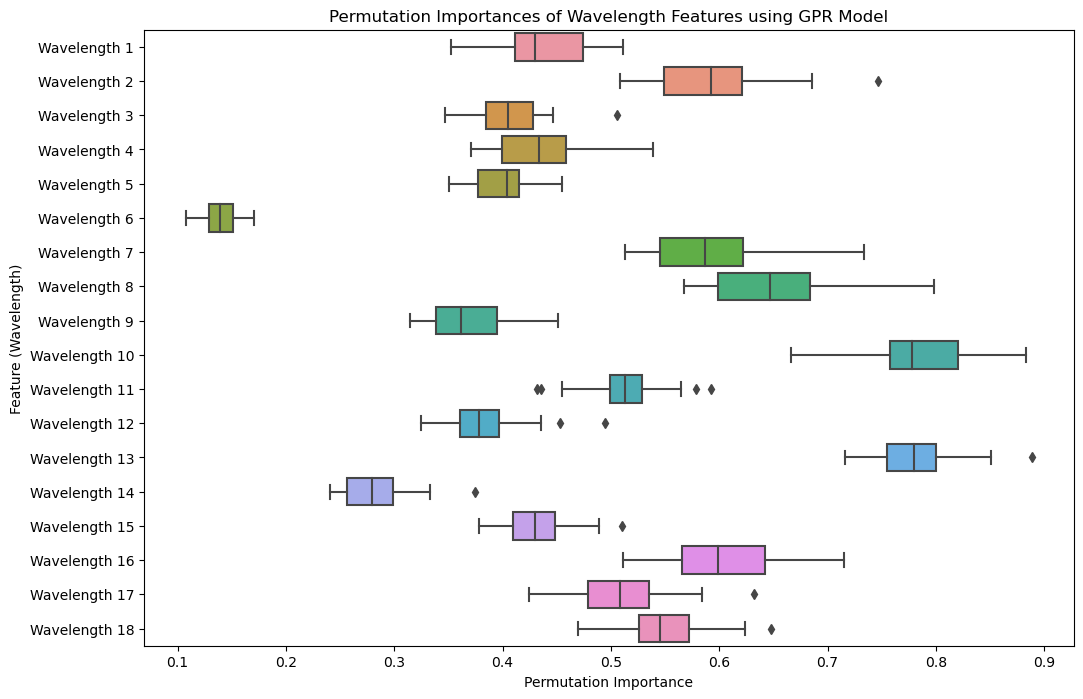

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Function to compute and plot feature importances using permutation importance
def plot_feature_importances(model, X_test, y_test, feature_names):
    # Compute permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
    importances = perm_importance.importances.T  # Transpose to have shape (n_repeats, n_features)
    
    # Create a DataFrame for plotting
    importance_df = pd.DataFrame(importances, columns=feature_names)
    
    # Plot box plots
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=importance_df, orient='h')
    plt.xlabel('Permutation Importance')
    plt.ylabel('Feature (Wavelength)')
    plt.title('Permutation Importances of Wavelength Features using GPR Model')
    plt.show()

# Assuming `X_test` is your test set features and `feature_names` is the list of feature names
feature_names = [f'Wavelength {i+1}' for i in range(X_test.shape[1])]

# Plot feature importances for GPR model
plot_feature_importances(best_model, X_test, y_test, feature_names)

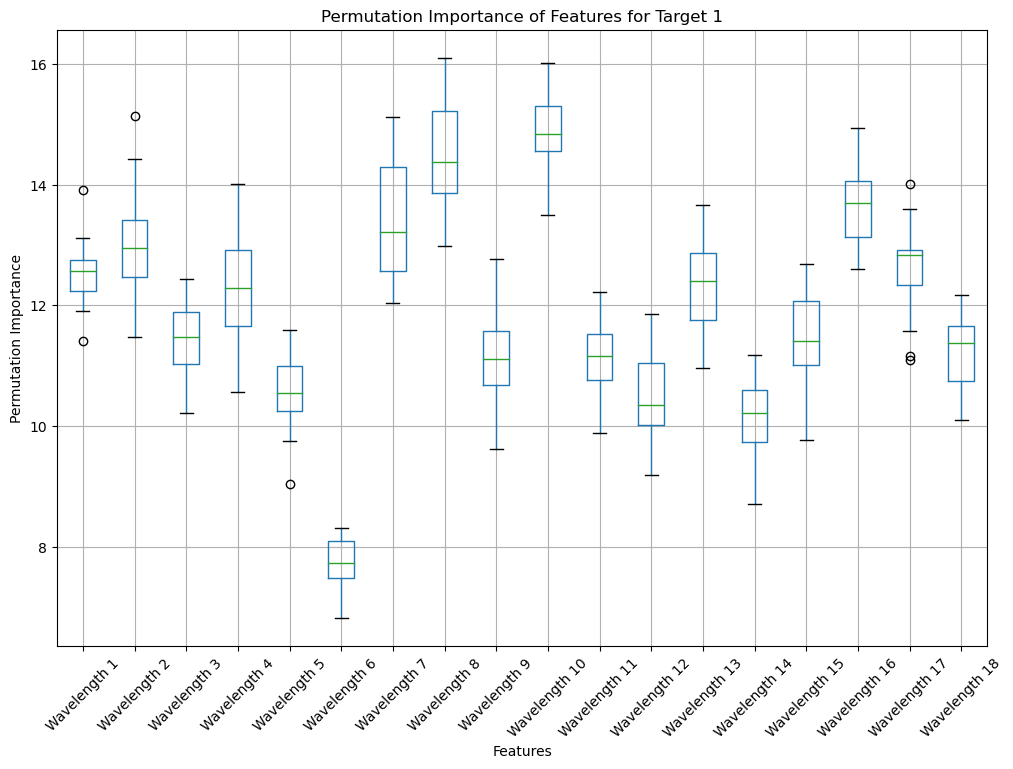

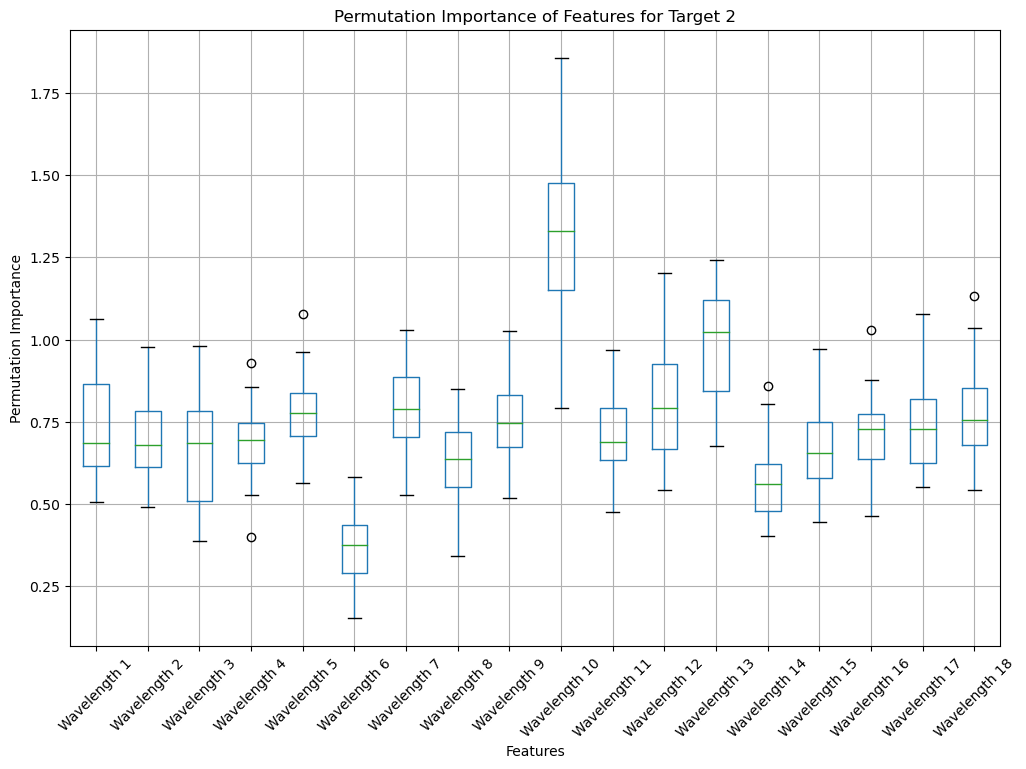

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


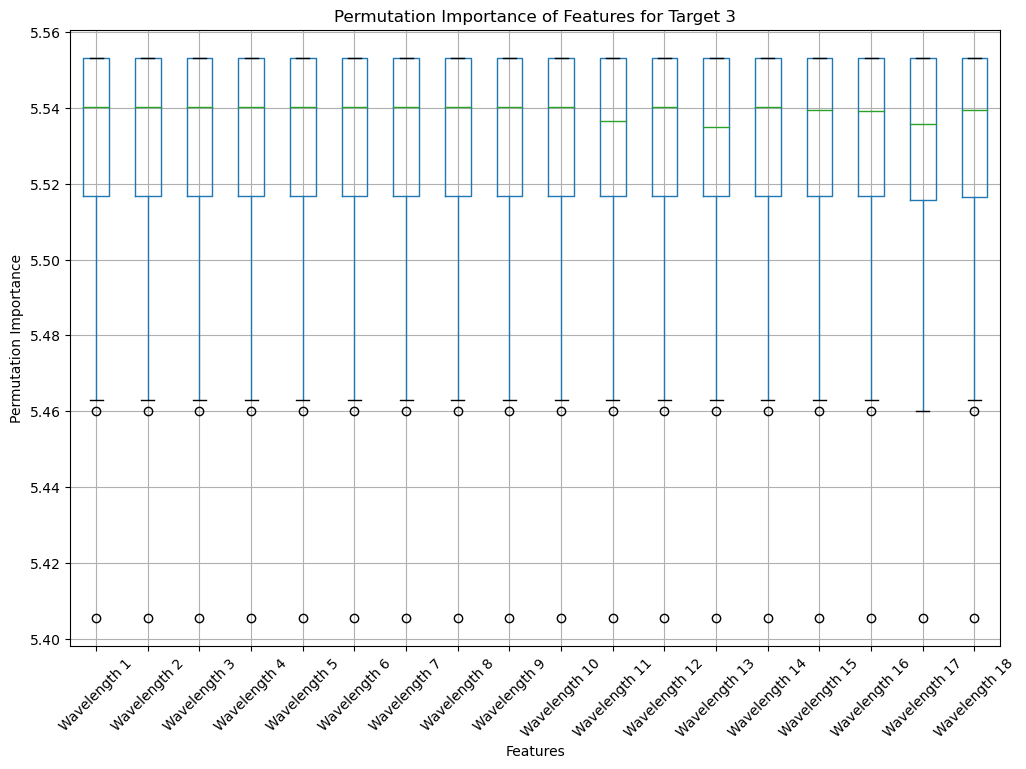

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


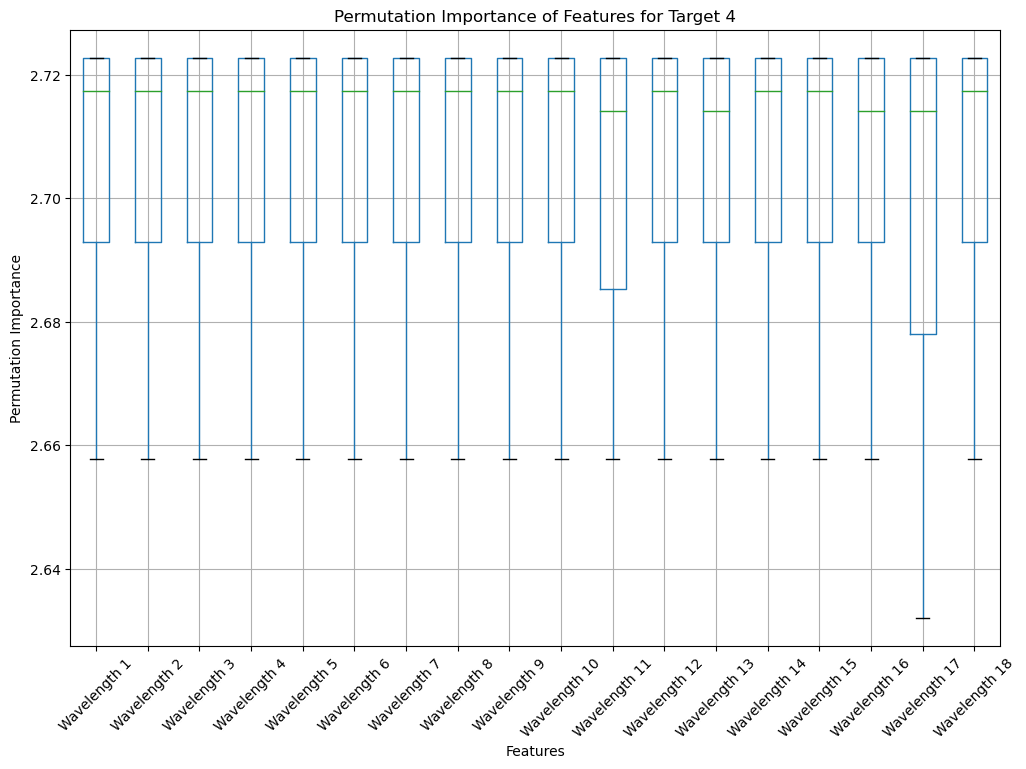

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


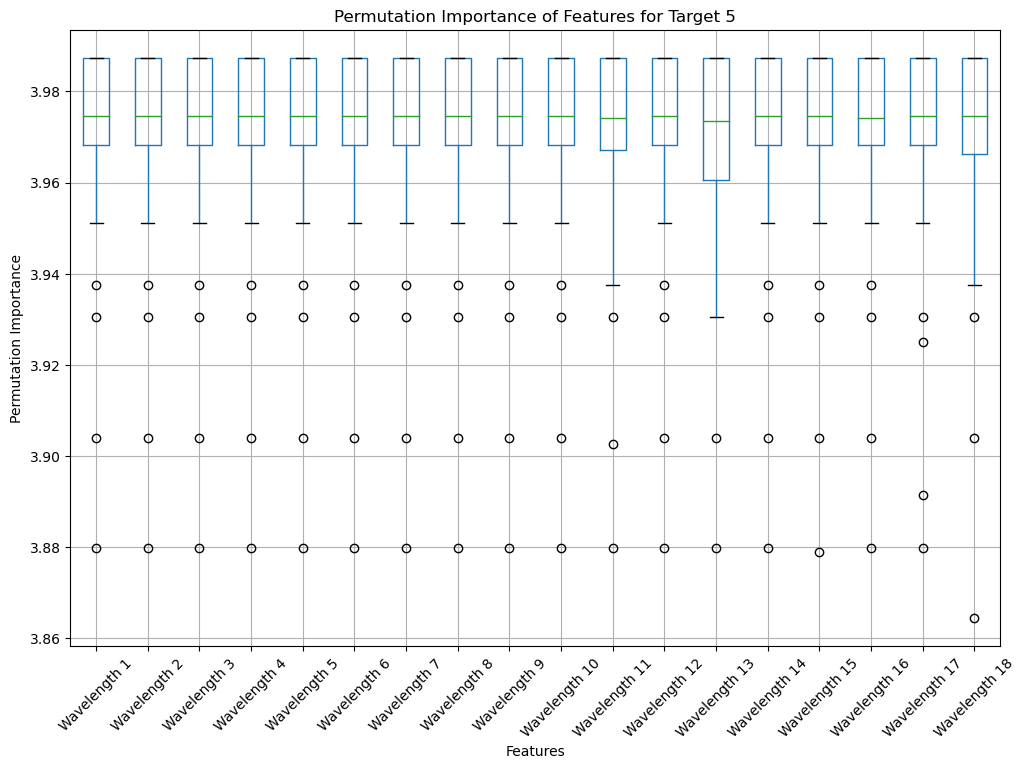

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


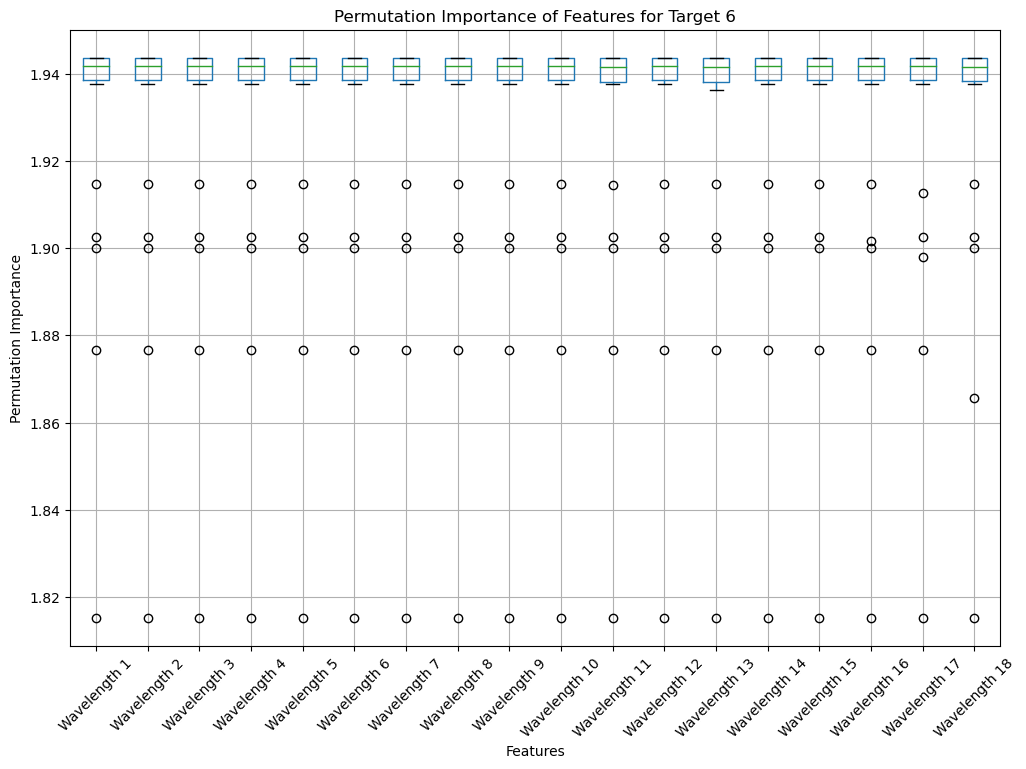

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


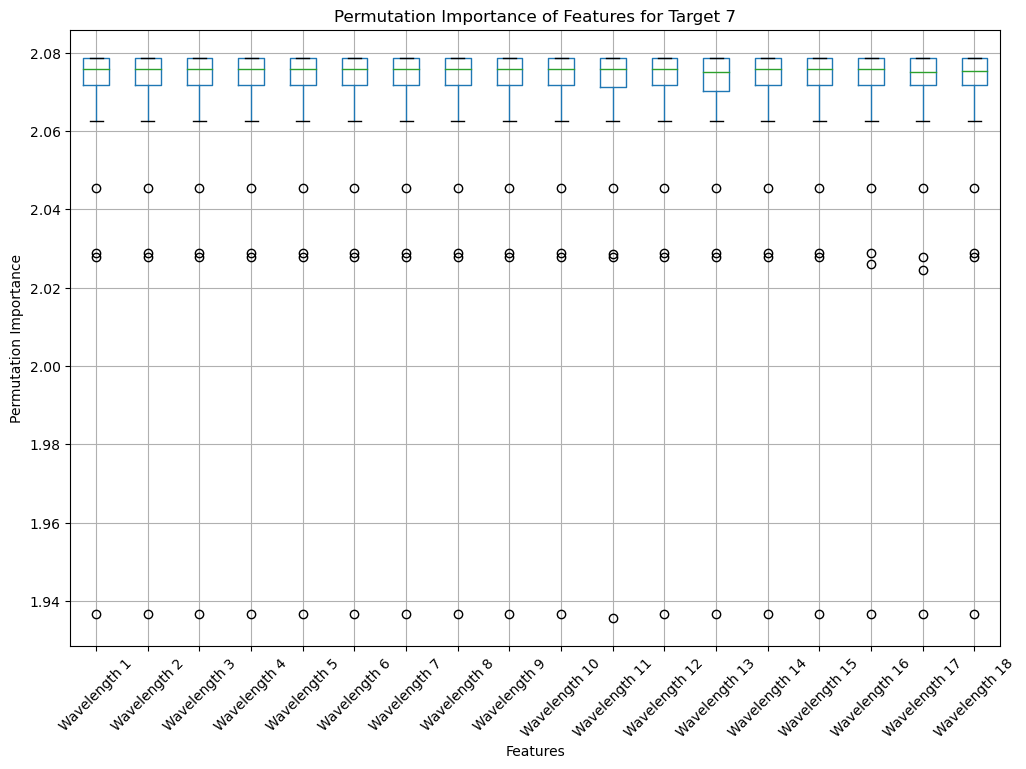

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


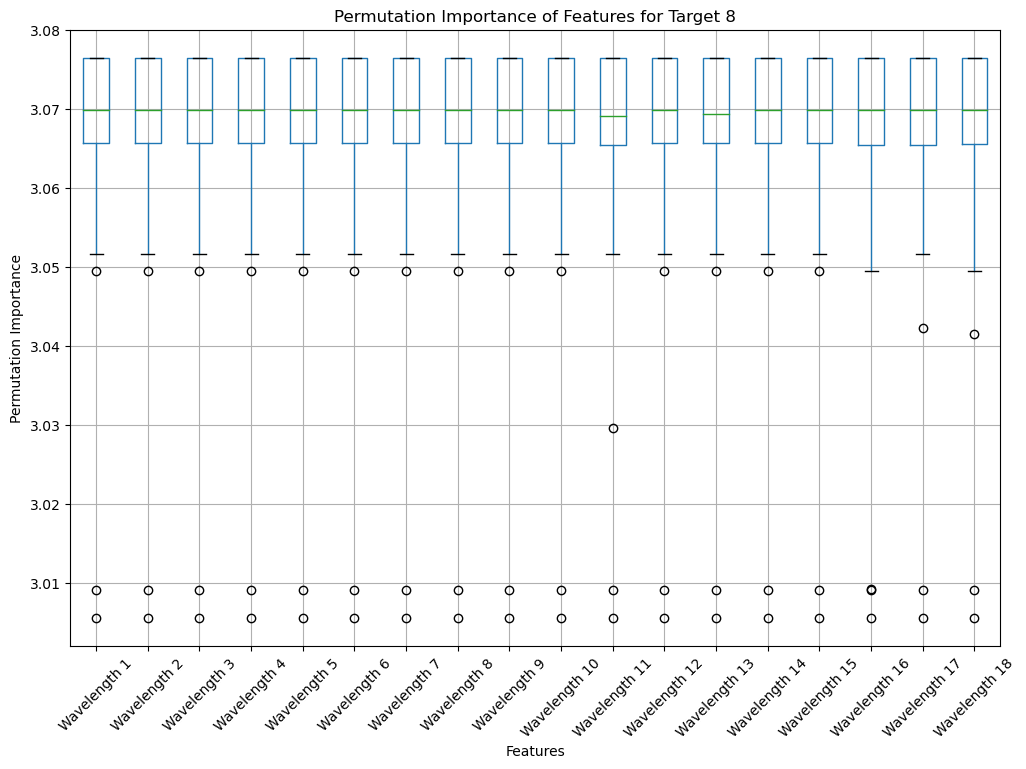

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


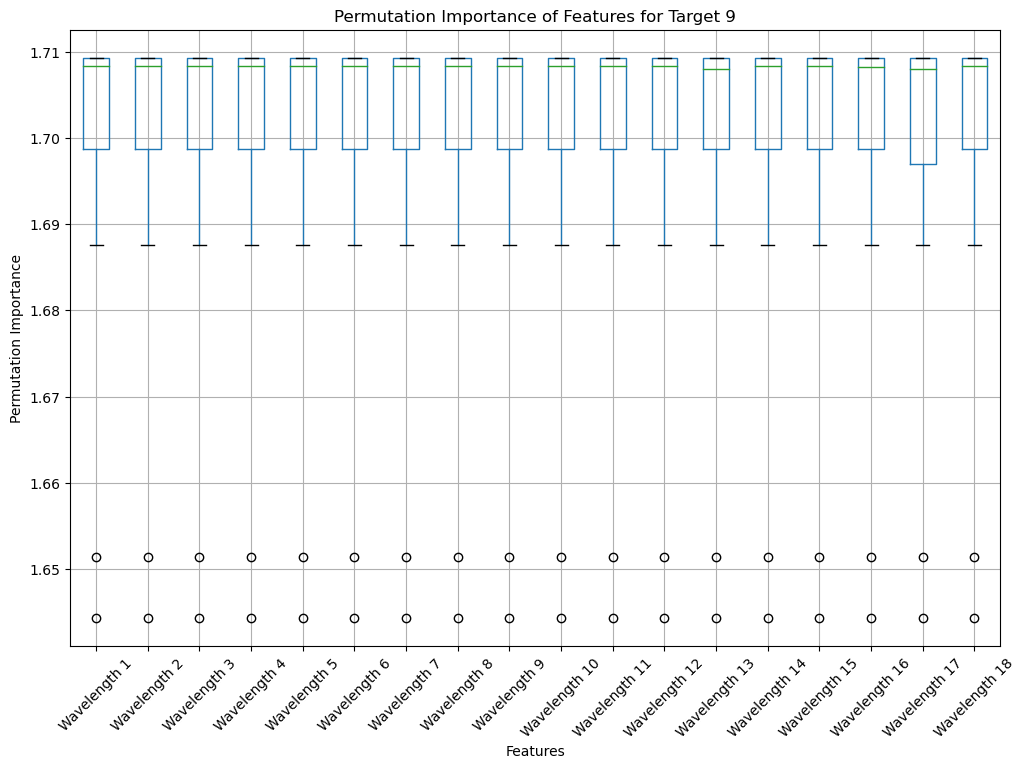

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


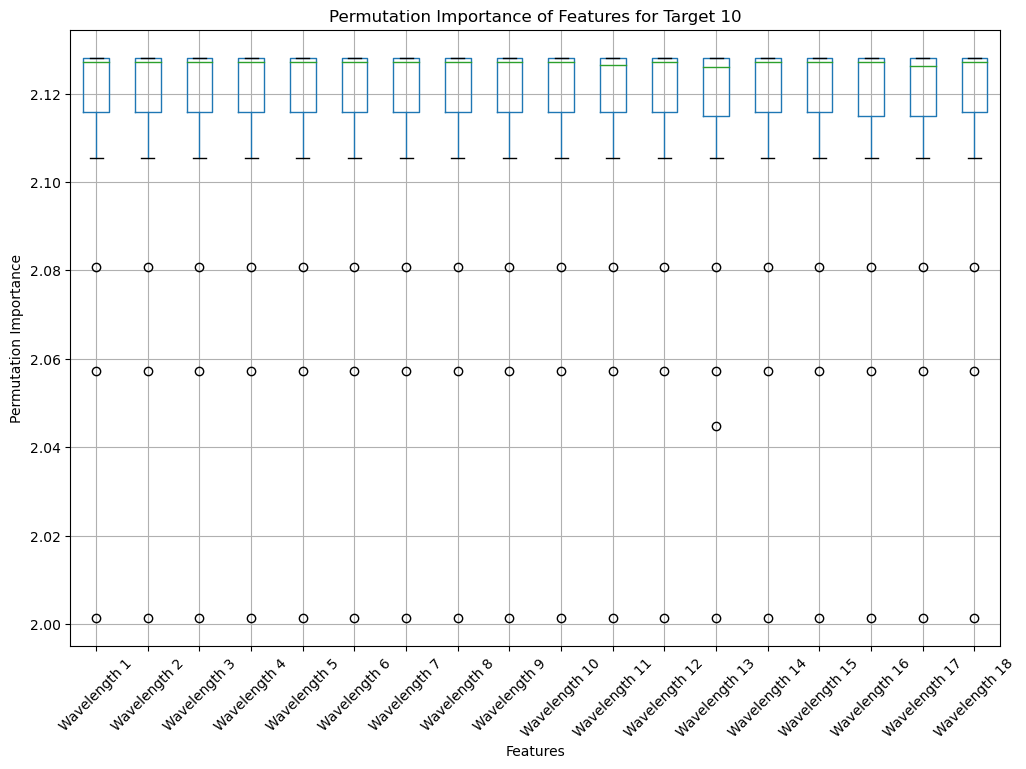

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


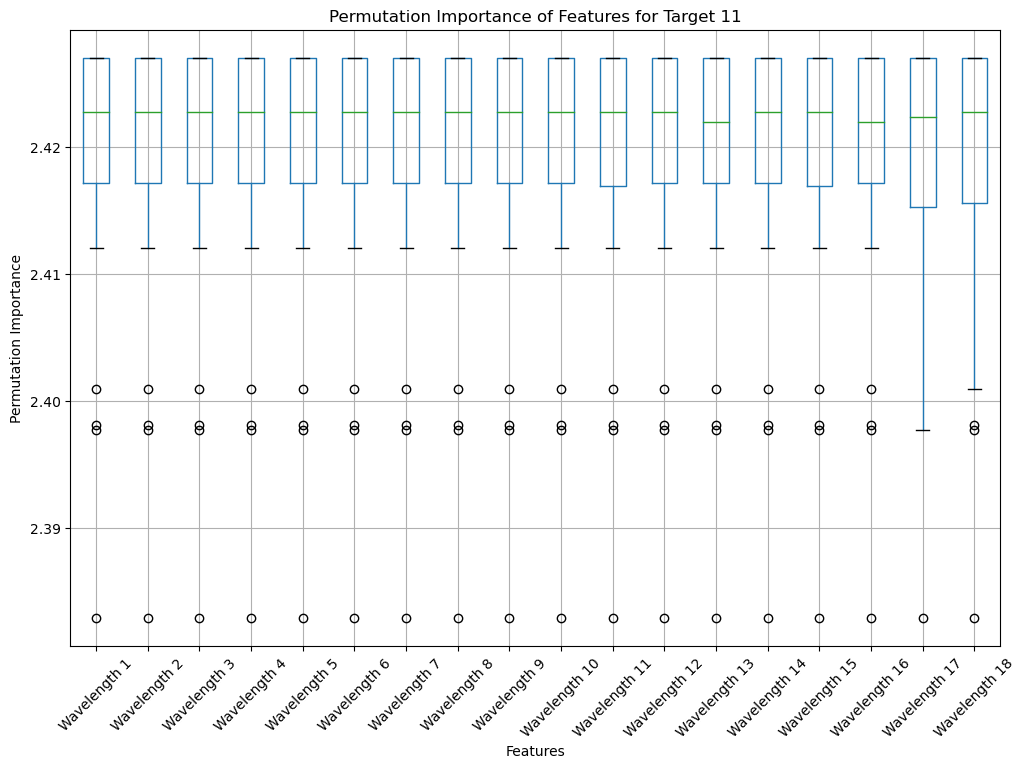

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


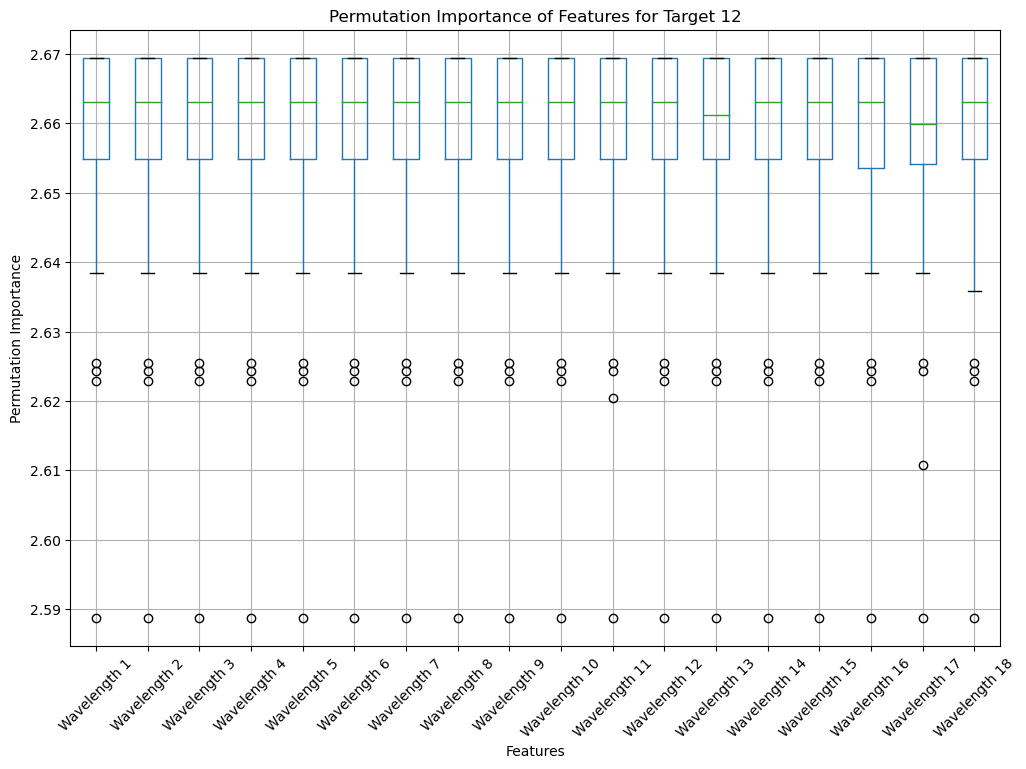

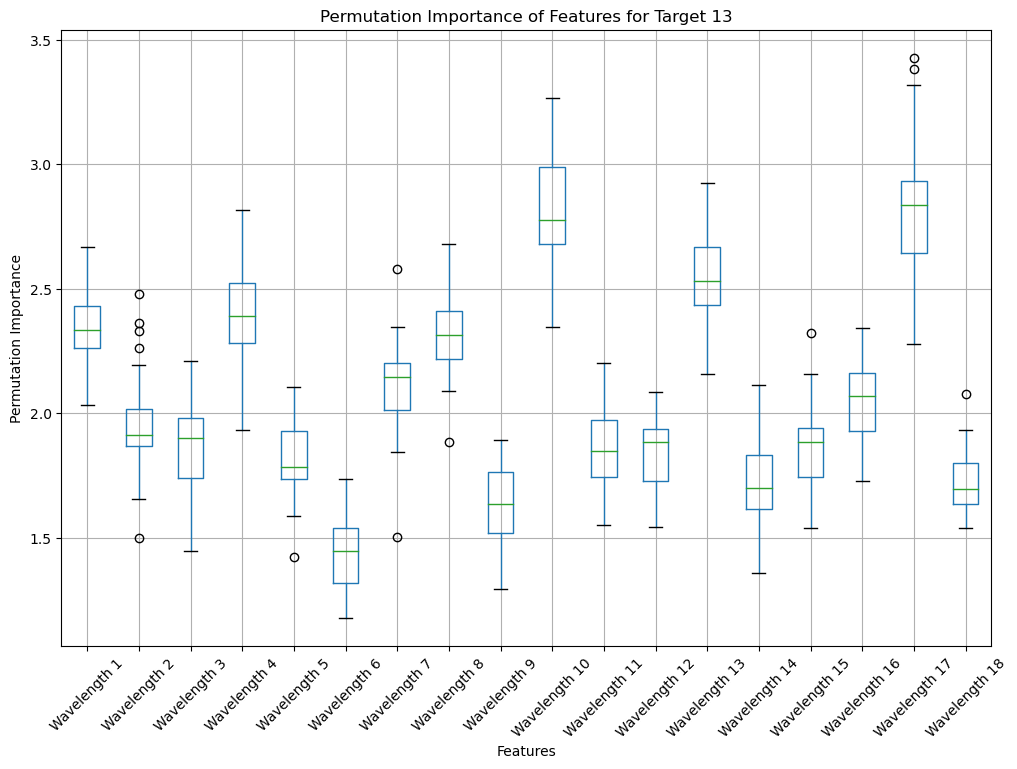

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def plot_feature_importances_for_each_target(X_test, y_test, feature_names):
    # Ensure y_test is a DataFrame for easier handling of multiple targets
    y_test_df = pd.DataFrame(y_test)
    
    for i in range(y_test_df.shape[1]):
        y_test_target = y_test_df.iloc[:, i].values
        
        # Fit a separate GPR model for each target
        model = GaussianProcessRegressor(kernel=RBF(length_scale=1))
        model.fit(X_test, y_test_target)
        
        # Get permutation importances
        perm_importance = permutation_importance(model, X_test, y_test_target, n_repeats=30, random_state=0)
        importances = perm_importance.importances
        
        # Create a DataFrame for plotting
        importance_df = pd.DataFrame(importances, index=feature_names).T
        
        # Plot box plots
        plt.figure(figsize=(12, 8))
        importance_df.boxplot()
        plt.title(f'Permutation Importance of Features for Target {i+1}')
        plt.xlabel('Features')
        plt.ylabel('Permutation Importance')
        plt.xticks(rotation=45)
        plt.show()

# Define the feature names
feature_names = [f'Wavelength {i+1}' for i in range(X_test.shape[1])]

# Assuming y_test is a 2D array with shape (n_samples, n_targets)
# Convert y_test to DataFrame if it's not already
if not isinstance(y_test, pd.DataFrame):
    y_test = pd.DataFrame(y_test)

# Plot feature importances for each target variable
plot_feature_importances_for_each_target(X_test, y_test, feature_names)

In [41]:
import joblib
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_score(metrics):
    # Define weights for each metric
    mse_weight = 0.5
    r2_weight = 0.3
    mae_weight = 0.2
    
    # Calculate the score
    score = (mse_weight * metrics['mse']) + (r2_weight * metrics['r2']) - (mae_weight * metrics['mae'])
    return score

def get_metrics(model, X_train, X_test, y_train, y_test):
    # Training predictions
    y_train_pred = model.predict(X_train)
    
    # Testing predictions
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    # Return metrics as dictionary
    return {'mse': test_mse, 'r2': test_r2, 'mae': test_mae}

# Define models (ensure these variables are defined and models are trained)
models = {
    'Gaussian Process': best_model
}

# Calculate scores for each model
scores = {}
for name, model in models.items():
    metrics = get_metrics(model, X_train, X_test, y_train, y_test)
    score = calculate_score(metrics)
    scores[name] = score
    print(f"Score for {name}: {score}")

# Find the best model
best_model_name = max(scores, key=scores.get)
best_model_score = scores[best_model_name]

print(f"The best model is {best_model_name} with a score of {best_model_score}.")

Score for Gaussian Process: 1696.950921585985
The best model is Gaussian Process with a score of 1696.950921585985.


In [42]:
target_columns=y.columns

C:\Users\Vanshika\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


{'pH': 6.242513791663756, 'EC  (dS/m)': 0.11778714779134487, 'OC (%)': 0.5505571789554895, 'P   (kg/ha)': 18.88461270038675, 'K (kg/ha)': 365.4317470701776, 'Ca (meq/100g)': 12.74147130084899, 'Mg (meq/100g)': 3.5323643552974557, 'S (ppm)': 14.125723285344328, 'Fe (ppm)': 32.63897779267268, 'Mn (ppm)': 23.60164599750491, 'Cu (ppm)': 2.4899653311247048, 'Zn (ppm)': 1.0597536799179983, 'B (ppm)': 0.7245117178295561}


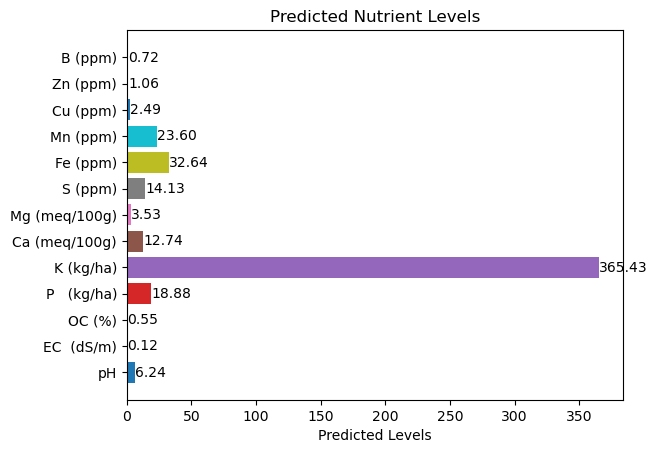

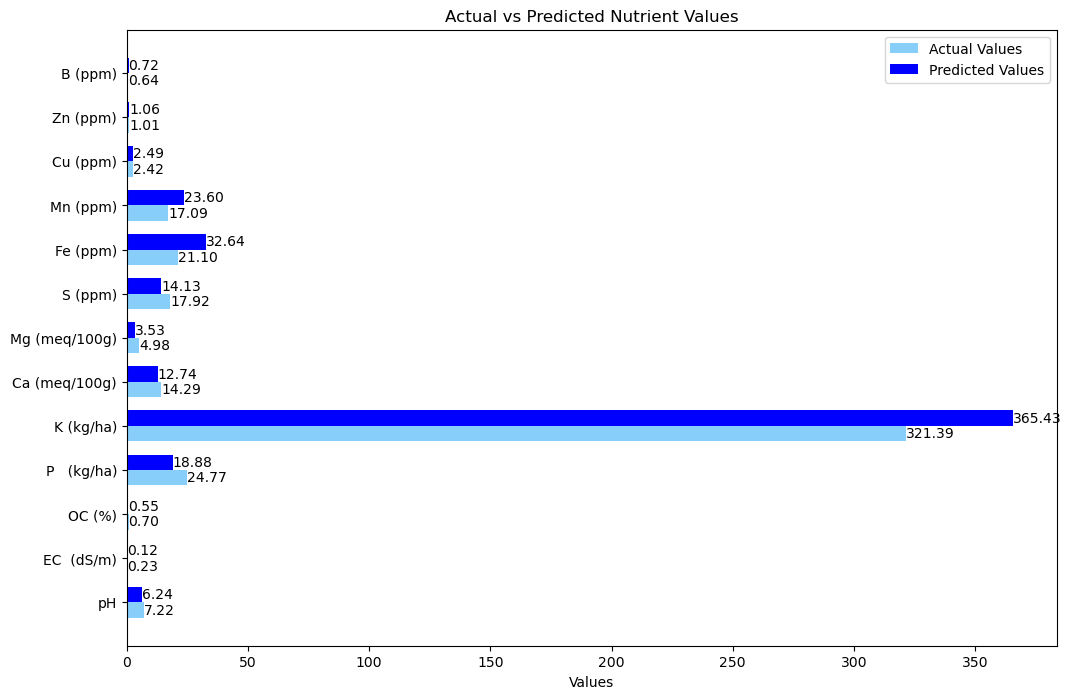

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Sample data
data = {
    'A(410)': [1947.48],
    'B(435)': [992.41],
    'C(460)': [2051.13],
    'D(485)': [707.77],
    'E(510)': [822.51],
    'F(535)': [1371.58],
    'G(560)': [318.85],
    'H(585)': [315.68],
    'R(610)': [1305.33],
    'I(645)': [159.24],
    'S(680)': [329.5],
    'J(705)': [49.9],
    'U(760)': [75.75],
    'V(810)': [237.65],
    'W(860)': [305.23],
    'K(900)': [60.1],
    'L(940)': [36.52],
    'T(730)': [83.32]
}

# Convert input data to DataFrame
def preprocess_input_data(input_data):
    input_df = pd.DataFrame(input_data)
    return input_df

df2 = preprocess_input_data(data)
scaled_input = scaler_X.transform(df2)
prediction = best_model.predict(scaled_input)

# Predicted Nutrient Levels
predicted_values = {}
for i, col in enumerate(target_columns):
    predicted_values[col] = prediction[0][i]

print(predicted_values)

# Plotting bar graph to represent the predicted nutrient levels
colors = list(mcolors.TABLEAU_COLORS.values())
fig, ax = plt.subplots()
bars = ax.barh(list(predicted_values.keys()), list(predicted_values.values()), color=colors[:len(predicted_values)])
ax.set_xlabel('Predicted Levels')
ax.set_title('Predicted Nutrient Levels')

# Adding color to each bar and displaying the value
for bar, value in zip(bars, predicted_values.values()):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2f}', va='center')

plt.show()

# Plot for actual vs predicted values
plt.figure(figsize=(12, 8))

# Bar width for both actual and predicted values
bar_width = 0.35

# Indices for nutrient labels
indices = np.arange(len(target_columns))


# Plot actual values
actual_bars = plt.barh(indices - bar_width / 2, y_test.mean(), bar_width, label='Actual Values', color='lightskyblue')

# Plot predicted values
predicted_bars = plt.barh(indices + bar_width / 2, [predicted_values[col] for col in target_columns], bar_width, label='Predicted Values', color='blue')

# Adding nutrient labels
plt.yticks(indices, target_columns)

# Adding labels and title
plt.xlabel('Values')
plt.title('Actual vs Predicted Nutrient Values')
plt.legend()

# Adding values on the bars
for actual_bar, predicted_bar in zip(actual_bars, predicted_bars):
    plt.text(actual_bar.get_width(), actual_bar.get_y() + actual_bar.get_height() / 2, f'{actual_bar.get_width():.2f}', va='center')
    plt.text(predicted_bar.get_width(), predicted_bar.get_y() + predicted_bar.get_height() / 2, f'{predicted_bar.get_width():.2f}', va='center')

plt.show()

In [ ]:
from sklearn.cross_decomposition import PLSRegression

# Initialize the PLSRegression model with a suitable number of components
pls = PLSRegression(n_components=2)

# Fit the model on the training data
pls.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = pls.predict(X_train)
y_test_pred = pls.predict(X_test)

# Check the model performance (R^2 score)
train_score = pls.score(X_train, y_train)
test_score = pls.score(X_test, y_test)
print(f'PLS Training R^2 Score: {train_score}')
print(f'PLS Testing R^2 Score: {test_score}')


In [ ]:
import numpy as np
from sklearn.utils import resample

def competitive_adaptive_reweighted_sampling(X_train, y_train, pls, iterations=50):
    n_features = X_train.shape[1]
    selected_features = list(range(n_features))
    
    for i in range(iterations):
        # Train the PLS model on the current set of features
        pls.fit(X_train[:, selected_features], y_train)
        
        # Get regression coefficients (absolute values for ranking)
        coefficients = np.abs(pls.coef_).flatten()
        
        # Sort features by importance (lower coefficients will be eliminated)
        ranked_features = np.argsort(coefficients)
        
        # Eliminate a certain percentage of less important features in each iteration
        elimination_rate = 0.1  # Eliminate 10% of the least important features
        n_to_eliminate = max(1, int(elimination_rate * len(selected_features)))
        selected_features = [selected_features[j] for j in ranked_features[:-n_to_eliminate]]
        
        print(f'Iteration {i + 1}: Number of selected features: {len(selected_features)}')
    
    return selected_features

# Apply CARS for feature selection
selected_features = competitive_adaptive_reweighted_sampling(X_train.values, y_train.values, pls)
print(f'Selected Features after CARS: {selected_features}')
